In [ ]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, channels_img, features_d):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(channels_img, features_d, kernel_size = 4 , stride = 2, padding = 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(features_d, 2*features_d, kernel_size = 4 , stride = 2, padding = 1),
            nn.BatchNorm2d(2*features_d),
            nn.LeakyReLU(0.2),
            nn.Conv2d(2*features_d, 4*features_d, kernel_size = 4 , stride = 2, padding = 1),
            nn.BatchNorm2d(4*features_d),
            nn.LeakyReLU(0.2),         
            nn.Conv2d(4*features_d, 8*features_d, kernel_size = 4 , stride = 2, padding = 1),
            nn.BatchNorm2d(8*features_d),
            nn.LeakyReLU(0.2),      

            nn.Conv2d(8*features_d, 1, kernel_size=4, stride=2, padding=0),
            nn.Sigmoid()               
        )
    def forward(self, x):
        return self.net(x)

class Generator(nn.Module):
    def __init__(self, channels_noise, channels_img, features_g):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(channels_noise, 16*features_g, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(16*features_g),
            nn.ReLU(),
            nn.ConvTranspose2d(16*features_g, 8*features_g, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(8*features_g),
            nn.ReLU(), 
            nn.ConvTranspose2d(8*features_g, 4*features_g, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(4*features_g),
            nn.ReLU(),      
            nn.ConvTranspose2d(4*features_g, 2*features_g, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(2*features_g),
            nn.ReLU(),     
            nn.ConvTranspose2d(2*features_g, channels_img, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )
    def forward(self, x):
        return self.net(x)
     

Starting Training
Epoch[0/8] Batch 0/938                   Loss D: 1.4114, loss G: 1.2809 D(x): 0.5118


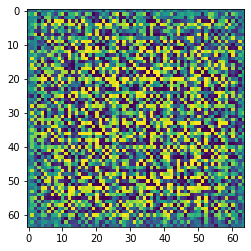

Epoch[0/8] Batch 400/938                   Loss D: 0.9988, loss G: 1.3700 D(x): 0.6608


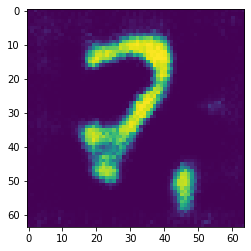

Epoch[0/8] Batch 800/938                   Loss D: 0.9421, loss G: 2.1047 D(x): 0.8377


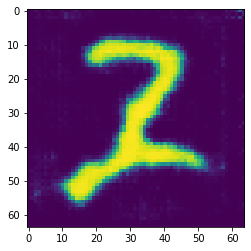

Epoch[1/8] Batch 0/938                   Loss D: 0.8996, loss G: 1.6069 D(x): 0.7375


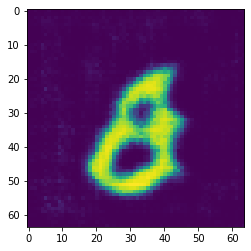

Epoch[1/8] Batch 400/938                   Loss D: 0.7823, loss G: 1.7433 D(x): 0.7437


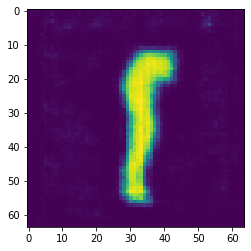

Epoch[1/8] Batch 800/938                   Loss D: 0.9919, loss G: 2.1608 D(x): 0.8900


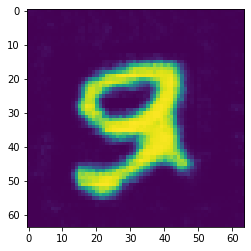

Epoch[2/8] Batch 0/938                   Loss D: 1.0235, loss G: 3.2958 D(x): 0.9383


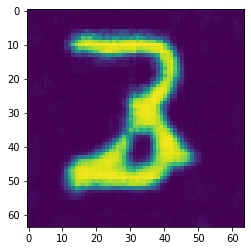

Epoch[2/8] Batch 400/938                   Loss D: 0.8270, loss G: 1.9118 D(x): 0.8180


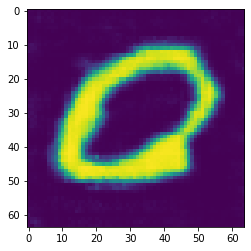

Epoch[2/8] Batch 800/938                   Loss D: 0.9830, loss G: 2.3758 D(x): 0.8610


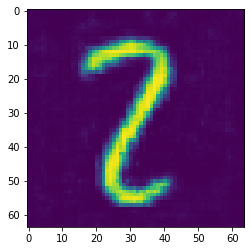

Epoch[3/8] Batch 0/938                   Loss D: 0.8596, loss G: 2.2930 D(x): 0.8308


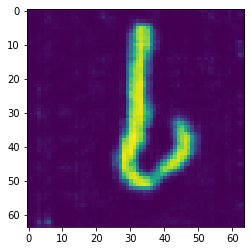

Epoch[3/8] Batch 400/938                   Loss D: 0.7299, loss G: 2.0220 D(x): 0.8210


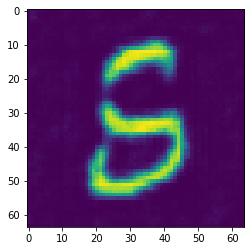

Epoch[3/8] Batch 800/938                   Loss D: 0.8066, loss G: 1.7910 D(x): 0.7901


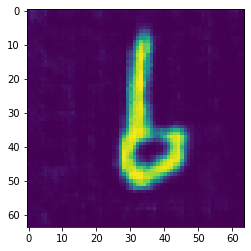

Epoch[4/8] Batch 0/938                   Loss D: 0.7421, loss G: 2.4062 D(x): 0.9132


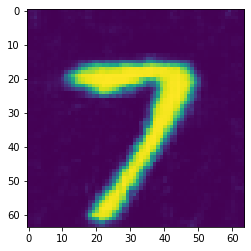

Epoch[4/8] Batch 400/938                   Loss D: 0.7770, loss G: 1.7707 D(x): 0.7252


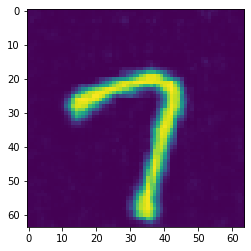

Epoch[4/8] Batch 800/938                   Loss D: 0.7091, loss G: 2.5272 D(x): 0.8976


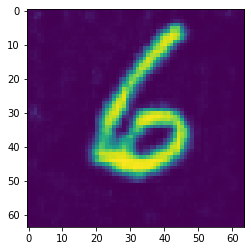

Epoch[5/8] Batch 0/938                   Loss D: 0.7060, loss G: 2.1543 D(x): 0.8253


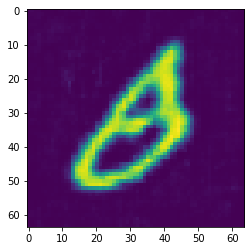

Epoch[5/8] Batch 400/938                   Loss D: 0.7304, loss G: 1.8125 D(x): 0.8018


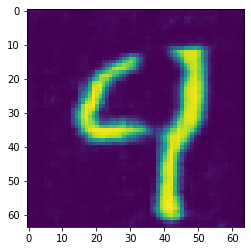

Epoch[5/8] Batch 800/938                   Loss D: 0.9124, loss G: 1.2650 D(x): 0.6359


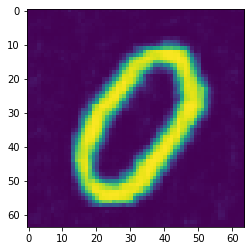

Epoch[6/8] Batch 0/938                   Loss D: 0.6758, loss G: 2.2303 D(x): 0.8815


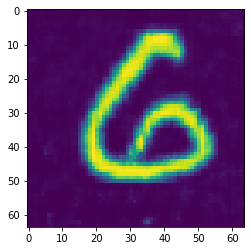

Epoch[6/8] Batch 400/938                   Loss D: 0.6763, loss G: 1.9642 D(x): 0.8894


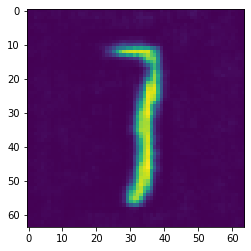

Epoch[6/8] Batch 800/938                   Loss D: 0.7800, loss G: 1.7125 D(x): 0.7193


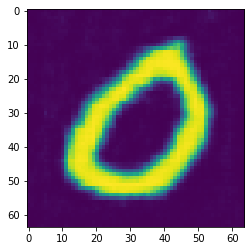

Epoch[7/8] Batch 0/938                   Loss D: 0.6926, loss G: 2.2584 D(x): 0.8352


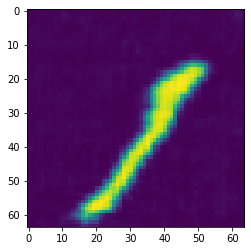

Epoch[7/8] Batch 400/938                   Loss D: 0.6710, loss G: 2.2857 D(x): 0.8895


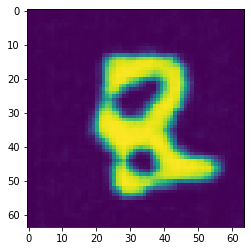

Epoch[7/8] Batch 800/938                   Loss D: 0.6661, loss G: 2.1641 D(x): 0.9038


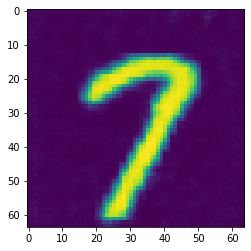

In [ ]:
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import random

lr = 0.0006
batch_size = 64
image_size = 64
channels_img = 1
channels_noise = 256
num_epochs = 8
features_d = 16
features_g = 16

my_transform = transforms.Compose([
                                   transforms.Resize(image_size),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,),(0.5,)),

])

dataset = datasets.MNIST(root = '', train=True, transform= my_transform, download= True)
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

netD = Discriminator(channels_img, features_d).to(device)
netG = Generator(channels_noise, channels_img, features_g).to(device)

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))

netG.train()
netD.train()

criterion = nn.BCELoss()

real_label = 1
fake_label = 0

fixed_noise = torch.randn(64, channels_noise, 1, 1).to(device)
writer_real = SummaryWriter(f'runs/GAN_MNIST/test_real')
writer_fake = SummaryWriter(f'runs/GAN_MNIST/test_fake')
step = 100
print("Starting Training")

for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(dataloader):
        data = data.to(device)
        batch_size = data.shape[0]

        netD.zero_grad()
        label = (torch.ones(batch_size)*0.9).to(device)
        output = netD(data).reshape(-1)
        lossD_real = criterion(output, label)
        D_x = output.mean().item()

        noise = torch.randn(batch_size, channels_noise, 1, 1).to(device)
        fake = netG(noise)
        label = (torch.ones(batch_size)*0.1).to(device)

        output = netD(fake.detach()).reshape(-1)
        lossD_fake = criterion(output, label)

        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()

        netG.zero_grad()
        label = torch.ones(batch_size).to(device)
        output = netD(fake).reshape(-1)
        lossG = criterion(output, label)
        lossG.backward()
        optimizerG.step()

        if batch_idx % 400 == 0:
            print(f'Epoch[{epoch}/{num_epochs}] Batch {batch_idx}/{len(dataloader)} \
                  Loss D: {lossD:.4f}, loss G: {lossG:.4f} D(x): {D_x:.4f}')
            with torch.no_grad():
                fake = netG(fixed_noise)
                f = fake.cpu()
                f = f.numpy()[:,:,:,:]
                a = random.randint(1,63)
                f = np.reshape(f[a], (64, 64))
                plt.imshow(f)
                plt.show()



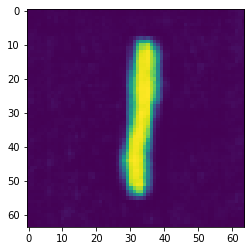

In [ ]:
h = fake.cpu()
h = h.detach().numpy()[:,:,:,:]
a = random.randint(1,31)
i1 = np.reshape(h[a], (64, 64))
plt.imshow(i1)
plt.show()